# Aquafil Data

In [68]:
import pandas as pd
import numpy as np

In [69]:
data = pd.read_csv('/Users/shemontod/Desktop/Instrumar/aquafil_short/scaled_labeled_data.csv')

data.drop(columns=["TimeStamp_start","TimeStamp_end","ThreadlineId", "count"],  inplace=True)

X = data.loc[:, data.columns != 'Label']
y = data['Label']


In [4]:
type(X)

pandas.core.frame.DataFrame

In [70]:
len(X.columns)

48

# Filter Method

## Information Gain

###  It measures the information/dependency between a particular variable and the target. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency. 

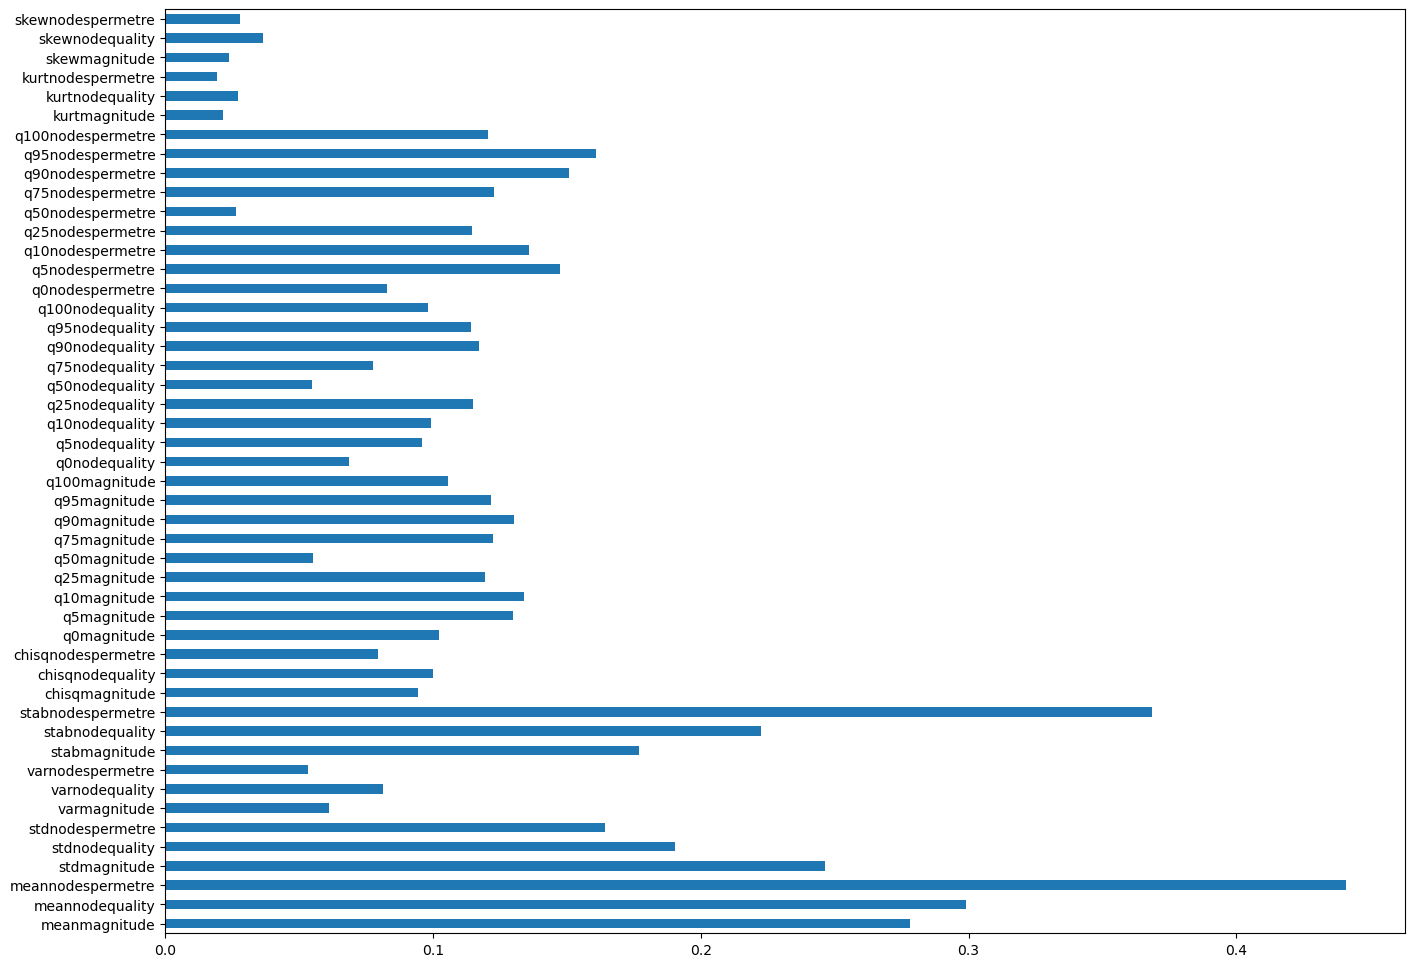

In [19]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
importances = mutual_info_classif(X,y)
feature_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feature_importances.plot(kind='barh')
plt.show()

## Chi-square Test

### Computes chi-squared stats between each non-negative feature and class. This score should be used to evaluate categorical variables in a classification task

In [22]:
from sklearn.feature_selection import SelectKBest, chi2

# convert to categorical data by converting data to integers
a = X.astype(int)
chi2_selector = SelectKBest(chi2, k=10)
X_best = chi2_selector.fit_transform(a, y)

print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_best.shape[1])
print(X_kbest)

Original number of features: 48
Reduced number of features: 10
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:
selected_features = X.columns[chi2_selector.get_support()]
print('Selected features:', selected_features)

Selected features: Index(['stdnodequality', 'varnodequality', 'chisqnodequality',
       'q90nodequality', 'q95nodequality', 'q100nodequality',
       'q10nodespermetre', 'q75nodespermetre', 'kurtmagnitude',
       'kurtnodequality'],
      dtype='object')


## ANOVA F-value 

### For quantitative features we compute the ANOVA F-value between each feature and the target vector

In [64]:
from sklearn.feature_selection import f_classif

# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=30)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(X, y)

In [65]:
# Get the names of the selected features
selected_features = X.columns[fvalue_selector.get_support()]
print('Selected features:', selected_features)

Selected features: Index(['meanmagnitude', 'meannodequality', 'meannodespermetre', 'stdmagnitude',
       'stdnodequality', 'stdnodespermetre', 'varnodequality', 'stabmagnitude',
       'stabnodequality', 'stabnodespermetre', 'q0magnitude', 'q5magnitude',
       'q10magnitude', 'q90magnitude', 'q100magnitude', 'q0nodequality',
       'q5nodequality', 'q10nodequality', 'q25nodequality', 'q75nodequality',
       'q90nodequality', 'q95nodequality', 'q100nodequality',
       'q0nodespermetre', 'q5nodespermetre', 'q10nodespermetre',
       'q75nodespermetre', 'q90nodespermetre', 'q95nodespermetre',
       'q100nodespermetre'],
      dtype='object')


## Correlation Matrix

### Variables should be correlated with the target but uncorrelated among themselves. Variables highly correlated with the target are good.
*  correlation between two features is 0 this means that changing any of these two features will not affect the other.
* correlation value greater than 0 is positive corelation
* correlation value lesser than 0 is negative corelation

In [28]:
df = pd.DataFrame(X)

<AxesSubplot:>

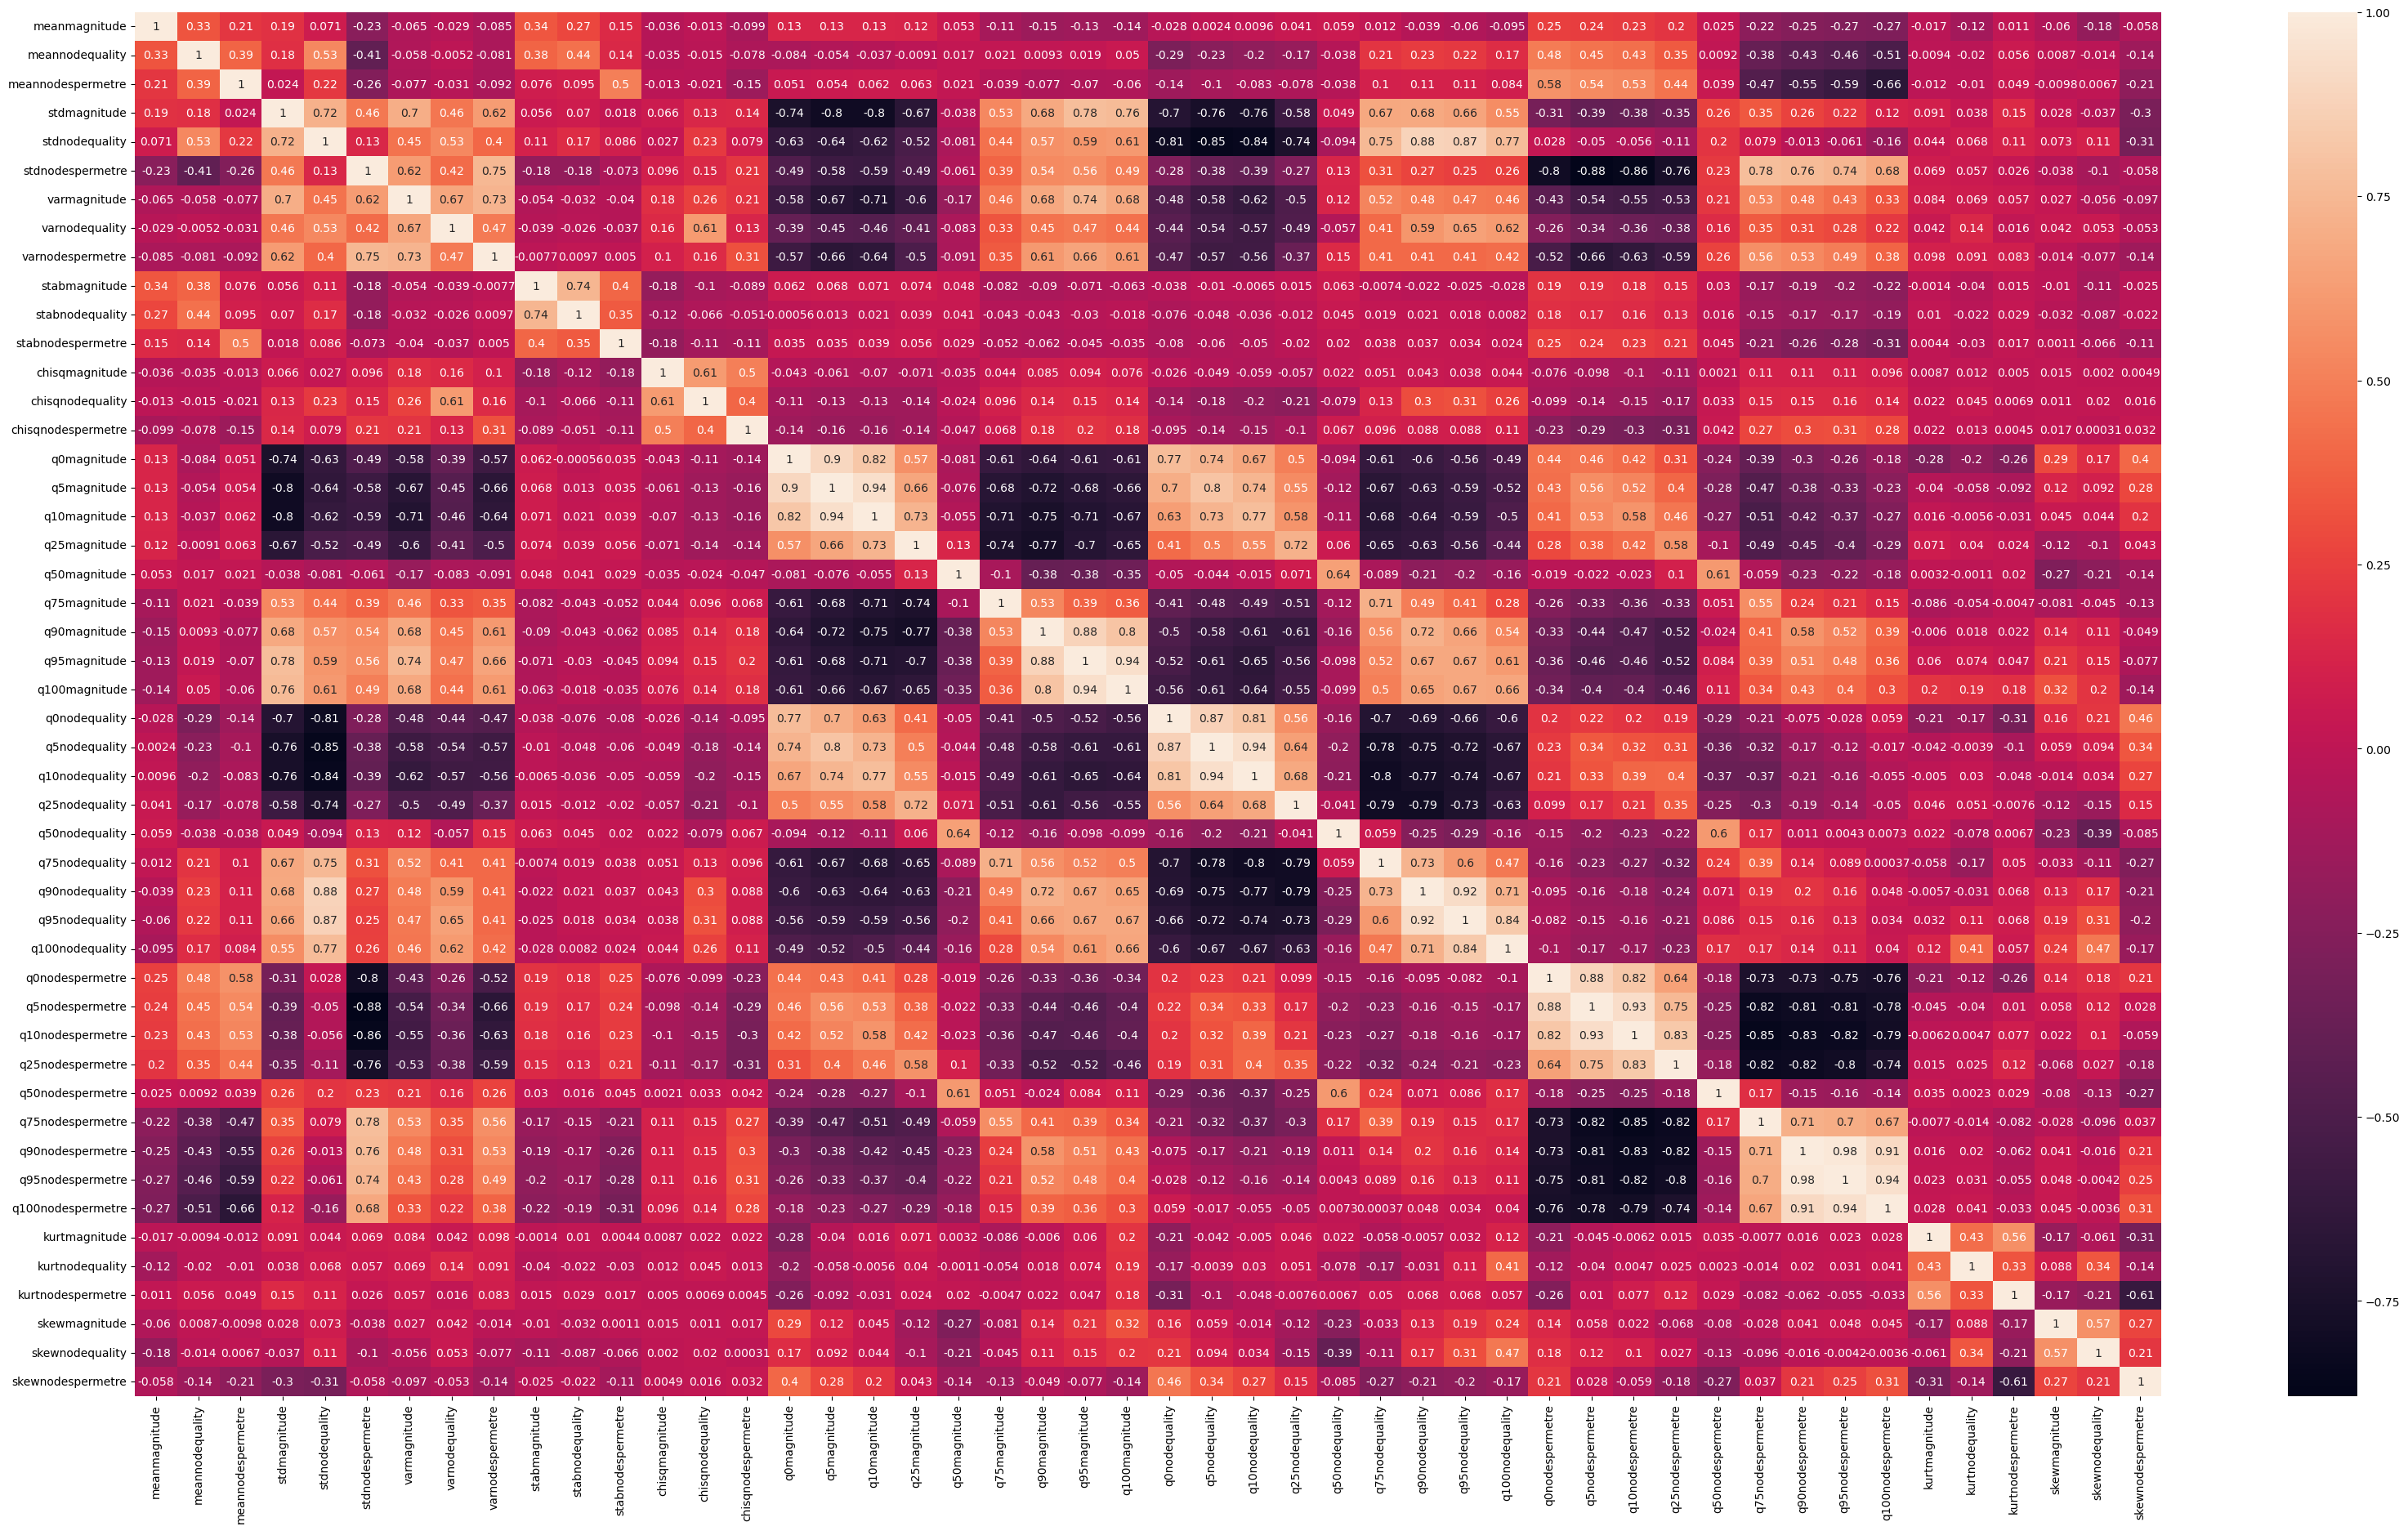

In [49]:
import  seaborn as sns

corelation =  df.corr()

plt.figure(figsize=(40, 22))
sns.heatmap(corelation, annot = True)

# Wrapper Method

### Computationally expensive and less feasible for big feature space

## Forward Feature Selection

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [56]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i): # j will be always 1 less than i
            if abs(corr_matrix.iloc[i, j]) > threshold: # (checking between features as pairs)
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )
print(corr_features)

correlated features:  18
{'q95nodespermetre', 'q100nodequality', 'q100magnitude', 'q75nodequality', 'q10magnitude', 'q5magnitude', 'q95nodequality', 'q90nodespermetre', 'q95magnitude', 'q0nodespermetre', 'q100nodespermetre', 'q90nodequality', 'q10nodespermetre', 'q5nodespermetre', 'q25nodespermetre', 'q5nodequality', 'q75nodespermetre', 'q10nodequality'}


In [48]:
corr_matrix = X_train.corr()
len(corr_matrix.columns)

48

In [51]:
corr_matrix.iloc[5, 1]

-0.4118051430142445

In [52]:
corr_matrix.columns[5]

'stdnodespermetre'

In [59]:
sfs1 = SFS(RandomForestClassifier(), 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 38.0min finished

[2023-11-21 16:50:01] Features: 1/10 -- score: -0.5226263549746953[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:  2.4min finished

[2023-11-21 16:52:28] Features: 2/10 -- score: 0.22659546057883526[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:  2.2min finished

[2023-11-21 16:54:39] Features: 3/10 -- score: 0.537230839352323[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

In [60]:
sfs1.k_feature_idx_

(0, 1, 2, 5, 9, 10, 11, 12, 14, 41)

In [61]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['meanmagnitude', 'meannodequality', 'meannodespermetre',
       'stdnodespermetre', 'stabmagnitude', 'stabnodequality',
       'stabnodespermetre', 'chisqmagnitude', 'chisqnodespermetre',
       'q100nodespermetre'],
      dtype='object')

## Backward Elimination

In [71]:

sfs1 = SFS(RandomForestClassifier(), 
           k_features=10, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  9.3min finished

[2023-11-28 12:48:50] Features: 47/10 -- score: 0.6639462392356831[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:  9.1min finished

[2023-11-28 12:57:55] Features: 46/10 -- score: 0.6601866009723344[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:  8.9min finished

[2023-11-28 13:06:52] Features: 45/10 -- score: 0.6719016451124338[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

# Embedded Methods

## Random Forest Importance

### The measure of impurity for classification is either the Gini impurity or the information gain/entropy. For regression the measure of impurity is variance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)


In [ ]:
# visualizing the important features

plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(clf.feature_importances_, index= X.columns)

feat_importances.nlargest(7).plot(kind='barh')